In [9]:
rm(list=ls())
library(cowplot)
library(data.table)
data.dir = './'
figures.dir = './'
load('mHSC.cell_info_HS.SC.RData')
load('mHSC.cell_info_HS.SC_plate2.RData')
info.all <- rbindlist(list(info.HS.SC, info.HS.SC.plate2), use.names = T, fill = F)


# Fig 3a
## Uncorrected data, one plate, rPCA (after removing cycling and low-qual cells)

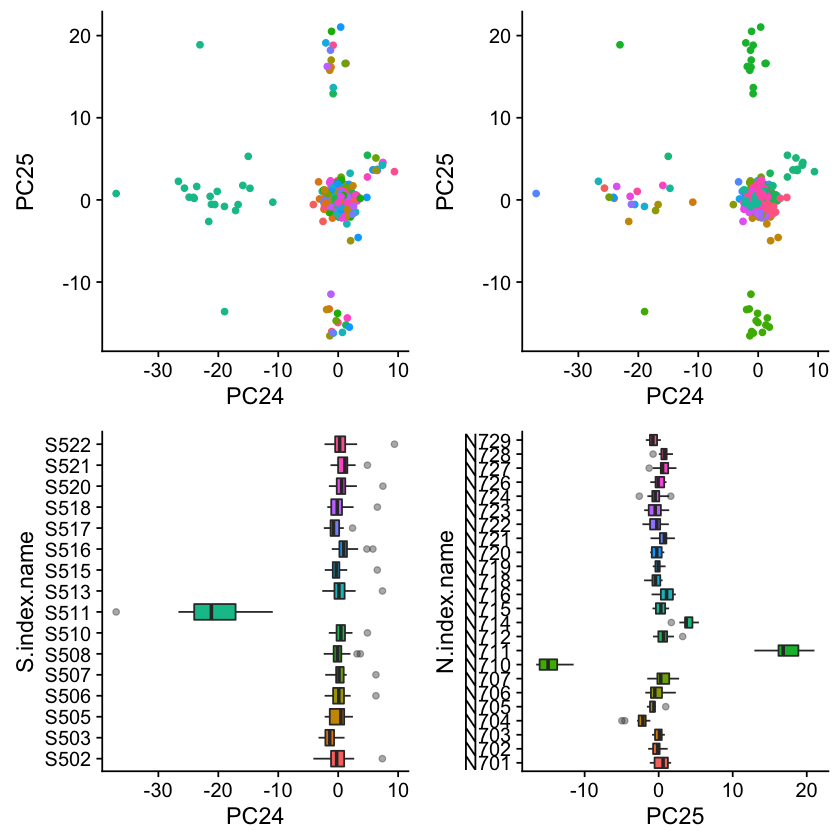

In [4]:
pc.scores = fread(paste0(data.dir, 'PC_allscores_uncorr_r3.csv'))
pc.scores = merge(pc.scores, info.HS.SC, by = 'cell.name')

p1 = ggplot(pc.scores, aes(PC24, PC25, color = S.index.name)) +
  geom_point()+
  theme(legend.position = 'none')


p2 = ggplot(pc.scores, aes(PC24, PC25, color = N.index.name)) +
  geom_point() +
  theme(legend.position = 'none')


p3 = ggplot(pc.scores, aes(S.index.name, PC24, fill = S.index.name)) +
  geom_boxplot(outlier.alpha = .4) +
  coord_flip() +
  theme(legend.position = 'none')

p4 = ggplot(pc.scores, aes(N.index.name, PC25, fill = N.index.name)) +
  geom_boxplot(outlier.alpha = .4) +
  coord_flip() +
  theme(legend.position = 'none')

p <- plot_grid(p1, p2, p3, p4, align = 'hv', nrow = 2, ncol = 2)
p

# Fig 3B 
## Corrected data, one plate, rPCA (after removing cycling and low-qual cells)

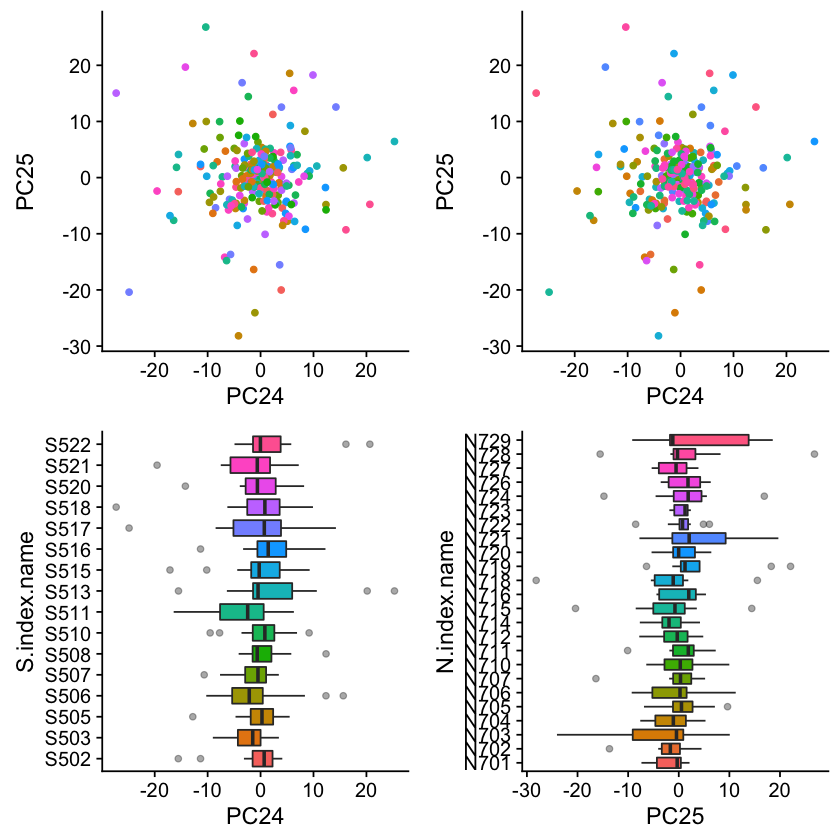

In [7]:
rm(pc.scores)
pc.scores = fread(paste0(data.dir, 'PC_allscores_all_r3.csv'))
pc.scores = merge(pc.scores, info.HS.SC, by = 'cell.name')

p1 = ggplot(pc.scores, aes(PC24, PC25, color = S.index.name)) +
  geom_point()+
  theme(legend.position = 'none')


p2 = ggplot(pc.scores, aes(PC24, PC25, color = N.index.name)) +
  geom_point() +
  theme(legend.position = 'none')


p3 = ggplot(pc.scores, aes(S.index.name, PC24, fill = S.index.name)) +
  geom_boxplot(outlier.alpha = .4) +
  coord_flip() +
  theme(legend.position = 'none')

p4 = ggplot(pc.scores, aes(N.index.name, PC25, fill = N.index.name)) +
  geom_boxplot(outlier.alpha = .4) +
  coord_flip() +
  theme(legend.position = 'none')

p <- plot_grid(p1, p2, p3, p4, align = 'hv', nrow = 2, ncol = 2)
p


# Fig 3C,D 
## Uncorrected data, two different sequencing runs

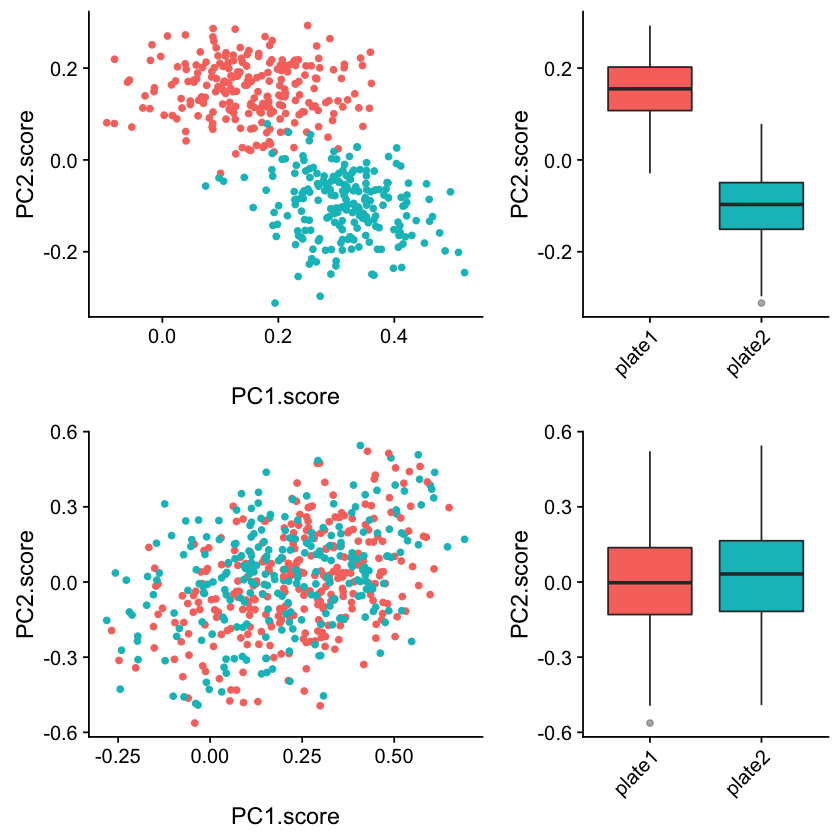

In [15]:
pc.scores = fread(file.path(data.dir, 'PC_allscores_p1_p2_uncorr.csv'))
pc.scores = merge(pc.scores, info.all, by = 'cell.name')
invisible(pc.scores[, nextera.plate:=substr(nextera.plate, 6, 11)])
p1 = ggplot(pc.scores, aes(PC1.score, PC2.score, color = nextera.plate)) +
  geom_point()+
  theme(legend.position = 'none')

p2 = ggplot(pc.scores, aes(nextera.plate, PC2.score, fill = nextera.plate)) +
  geom_boxplot(outlier.alpha = .4) +
  theme(legend.position = 'none', axis.text.x = element_text(angle = 45, hjust = 1), axis.title.x = element_blank())

# Corrected data, two different sequencing runs
pc.scores = fread(file.path(data.dir, 'PC_allscores_p1_p2_r2.csv'))
pc.scores = merge(pc.scores, info.all, by = 'cell.name')
invisible(pc.scores[, nextera.plate:=substr(nextera.plate, 6, 11)])
p3 = ggplot(pc.scores, aes(PC1.score, PC2.score, color = nextera.plate)) +
  geom_point()+
  theme(legend.position = 'none')

p4 = ggplot(pc.scores, aes(nextera.plate, PC2.score, fill = nextera.plate)) +
  geom_boxplot(outlier.alpha = .4) +
  theme(legend.position = 'none', axis.text.x = element_text(angle = 45, hjust = 1), axis.title.x = element_blank())

p <- plot_grid(p1, p2, p3, p4, align = 'hv', nrow = 2, ncol = 2, rel_widths = c(1,.7, 1, .7))
p